In [399]:
import pandas as pd
df=pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.000000,12.000000,219.000000,0.663594,1.000000,0.815385,4.000000,2.000000,1.000000,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.000000,9.000000,255.000000,0.604743,1.000000,0.791946,3.000000,1.000000,1.000000,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.000000,9.000000,211.000000,0.575130,1.000000,0.663866,3.000000,1.000000,1.000000,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.000000,9.000000,531.000000,0.503788,1.000000,0.665635,9.000000,0.000000,1.000000,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.000000,13.000000,1072.000000,0.415646,1.000000,0.540890,19.000000,19.000000,20.000000,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505


<a id='comp'></a>
## Univariate Analysis

In [400]:
df.shape

(39644, 61)

In [ ]:
def build_model(model,X_train,y_train,X_test,y_test):
    model=model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    print("Results on Train Data \n")
    print("Accuracy Score on Train Data",accuracy_score(y_train,y_pred_train),"\n")
    print(classification_report(y_train,y_pred_train),"\n")
    y_pred_proba_train=model.predict_proba(X_train)
    print("Roc_Score",roc_auc_score(y_train,y_pred_proba_train[:,1]),"\n")
    print("\n Confusion Matrix \n",confusion_matrix(y_train,y_pred_train),"\n")
    print("Results on Test Data \n")
    y_pred_test=model.predict(X_test)
    print("Accuracy Score on Test Data",accuracy_score(y_test,y_pred_test),"\n")
    print(classification_report(y_test,y_pred_test),"\n")
    y_pred_proba_test=model.predict_proba(X_test)
    print("Roc_Score",roc_auc_score(y_test,y_pred_proba_test[:,1]),"\n")
    print("\n Confusion Matrix \n",confusion_matrix(y_test,y_pred_test),"\n")

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [402]:
pd.options.display.float_format = '{:.6f}'.format


In [403]:
df.var().sort_values(ascending=False)



C:\Users\Puneeth\AppData\Local\Temp/ipykernel_18496/3429339848.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var().sort_values(ascending=False)


 kw_max_max                      46011163591.251106
 kw_avg_max                      18252617221.396557
 kw_min_max                       3362379600.633986
 self_reference_max_shares        1683262042.729158
 self_reference_avg_sharess        586188608.415086
 self_reference_min_shares         389615113.749467
 shares                            135185983.711573
 kw_max_avg                         37196239.144845
 kw_max_min                         14884093.603389
 kw_avg_avg                          1737520.469358
 kw_min_avg                          1293808.314862
 kw_avg_min                           385372.634748
 n_tokens_content                     221942.284045
 timedelta                             45866.119168
 kw_min_min                             4848.784648
 num_hrefs                               128.414618
 num_imgs                                 69.046685
 n_non_stop_words                         27.365777
 num_videos                               16.874473
 num_self_hr

In [404]:
df=df.drop(['url',' timedelta'],axis=1)

In [405]:
df=df.drop([' global_rate_negative_words',' global_rate_positive_words',' min_positive_polarity',' max_negative_polarity',' global_sentiment_polarity'],axis=1)

In [406]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity', ' rate_positive_words',
       ' rate_neg

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

<a id='comp'></a>
## Data Preprocessing

In [ ]:
#1)	Maxnegpolarity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,max_negative_polarity,min_positive_polarity these are the features that add little to no  info as the var of features is nearer to 0

In [ ]:
#2)	skewness exists so we have to perform transformations to reduce them

In [ ]:
#3)	since there are outliers we need to perform outliers treatment to remove the outliers to make the model more stable

In [408]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,rate_negative_words,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.287934,0.353825,0.756728,-0.259524,-0.521944,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.156156,0.104542,0.247786,0.127726,0.290290,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.185185,0.306244,0.600000,-0.328383,-0.700000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.280000,0.358755,0.800000,-0.253333,-0.500000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.384615,0.411428,1.000000,-0.186905,-0.300000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [409]:
Total = df.isnull().sum().sort_values(ascending=False) 

# 'isnull().sum()' returns the number of missing values in each variable
# 'isnull().count()' returns the count of the data, i.e. count of outcomes 'True' and 'False' of isnull() 
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
n_tokens_title,0,0.000000
LDA_03,0,0.000000
weekday_is_monday,0,0.000000
weekday_is_tuesday,0,0.000000
weekday_is_wednesday,0,0.000000
weekday_is_thursday,0,0.000000
weekday_is_friday,0,0.000000
weekday_is_saturday,0,0.000000
weekday_is_sunday,0,0.000000
is_weekend,0,0.000000


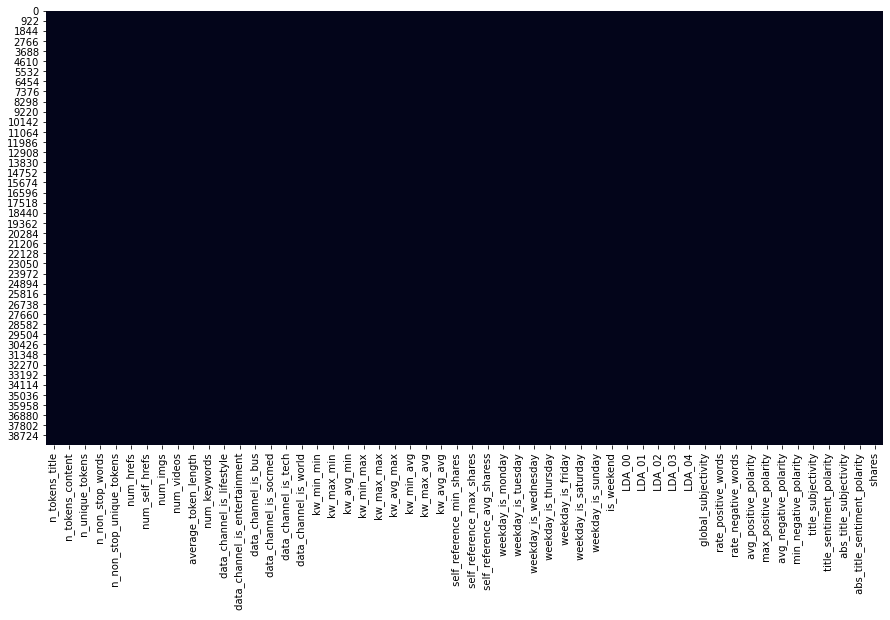

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [411]:
import numpy as np
df_numeric_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity', ' rate_positive_words',
       ' rate_neg

In [412]:
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,rate_negative_words,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,0.034186,-0.049619,-0.021662,-0.017096,-0.029146,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,0.101053,0.135123,0.415706,-0.130375,-0.450603,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,-0.001657,-0.000487,-0.009054,0.001453,0.009902,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.001245,0.002285,0.002062,-0.001372,-0.001214,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.001709,0.004671,-0.002245,-0.001972,0.004318,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,0.059817,0.188236,0.286733,-0.152146,-0.263576,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.010187,0.098062,0.189922,-0.058222,-0.122071,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,0.040029,0.096446,0.155232,-0.072500,-0.136522,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,0.074067,0.097440,0.125659,-0.115976,-0.138190,0.061028,0.021980,-0.021982,0.055231,0.023936
average_token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.322505,0.540117,0.471383,-0.324529,-0.278784,-0.040406,-0.016718,0.026586,-0.036953,-0.022007


In [ ]:
#4)	from correlation table we can also say that there is existence of multicollinearity as there is strong relationship among certain variables

<AxesSubplot:>

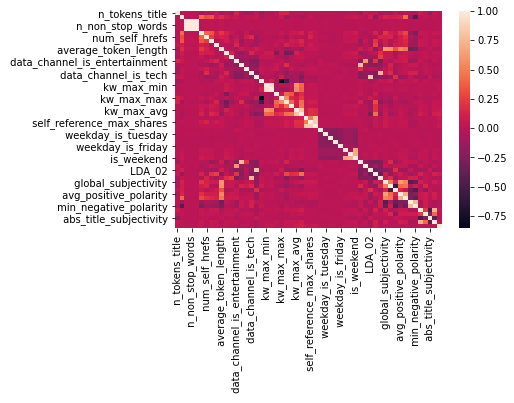

In [413]:
sns.heatmap(df_numeric_features.corr())

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


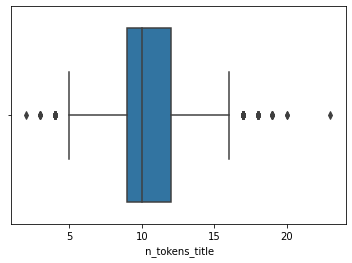

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


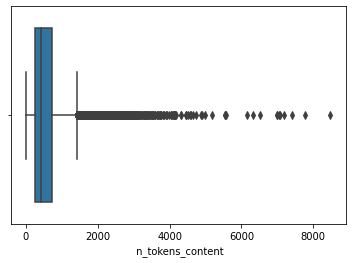

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


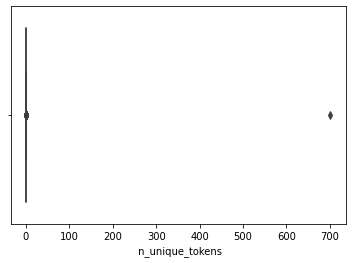

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


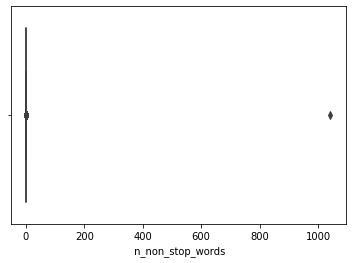

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


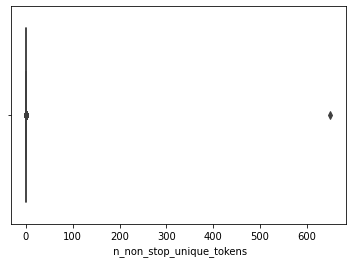

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


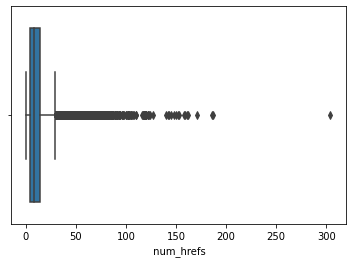

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


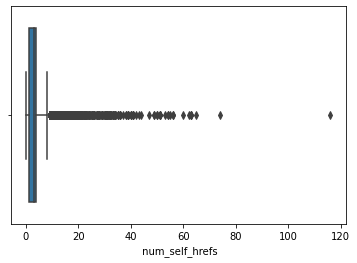

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


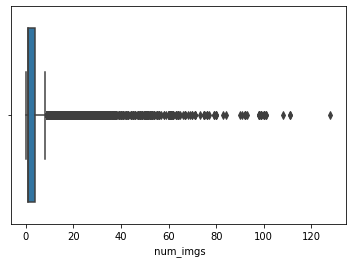

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


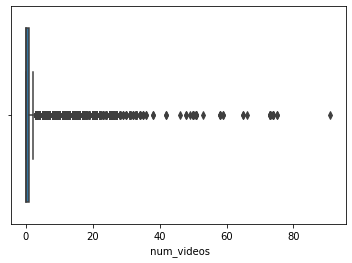

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


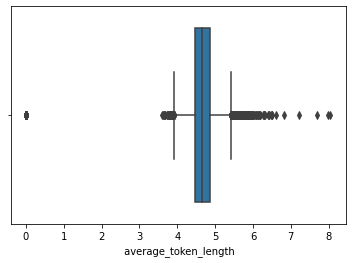

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


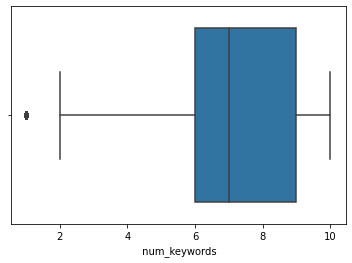

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


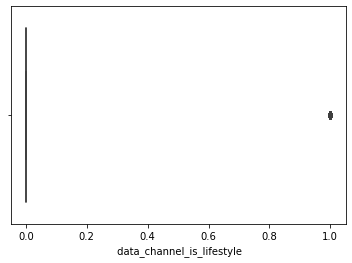

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


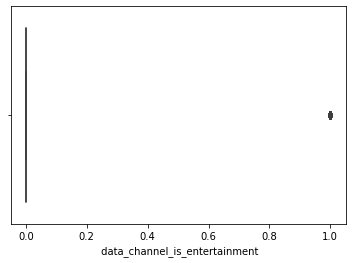

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


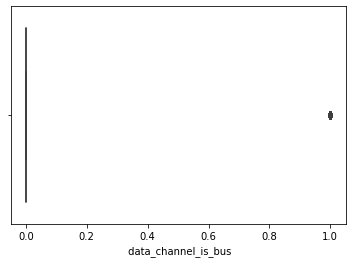

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


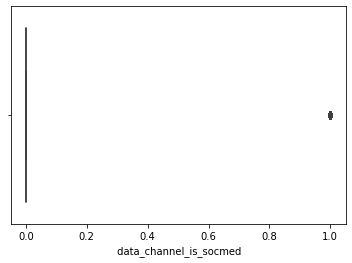

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


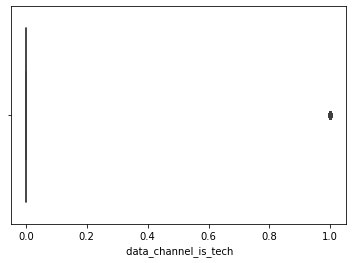

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


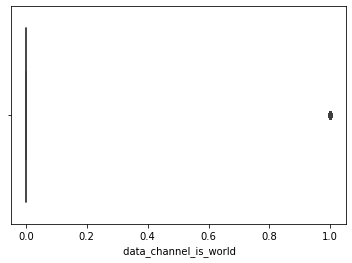

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


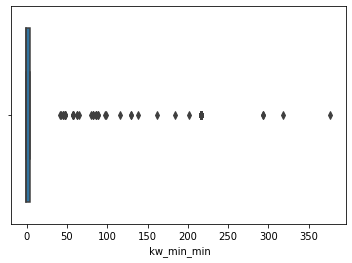

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


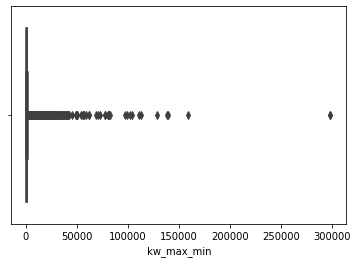

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


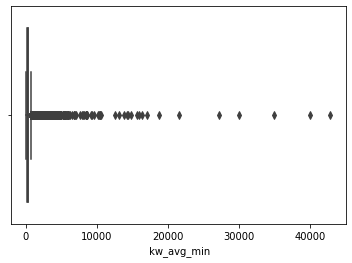

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


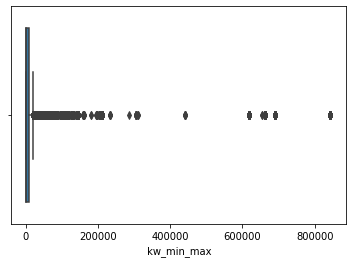

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


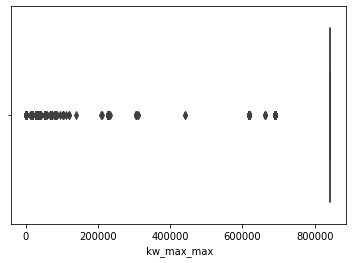

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


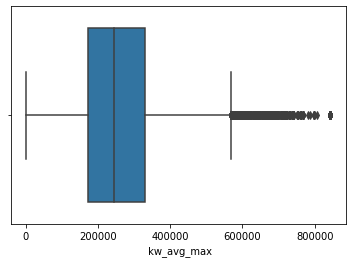

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


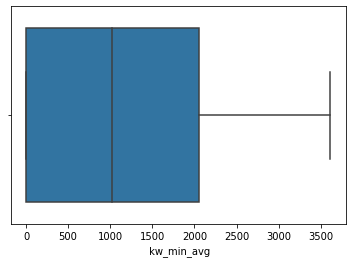

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


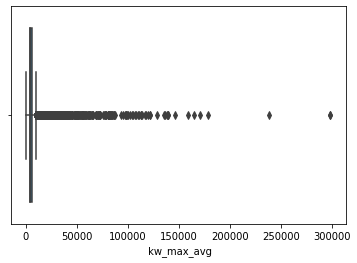

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


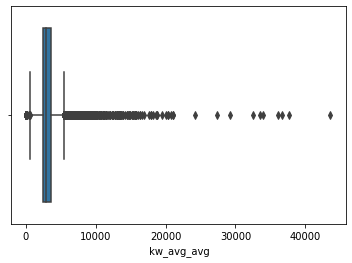

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


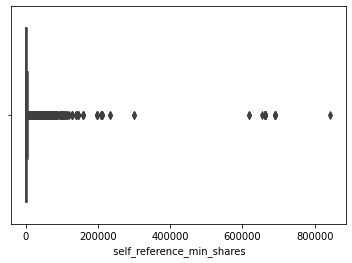

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


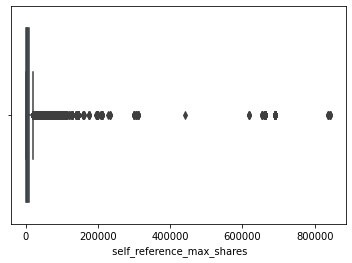

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


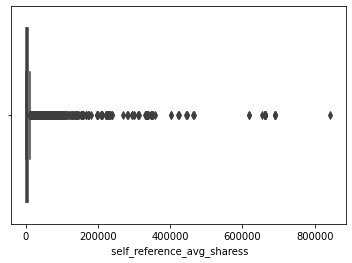

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


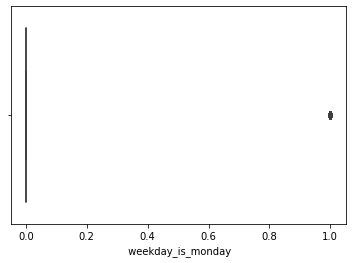

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


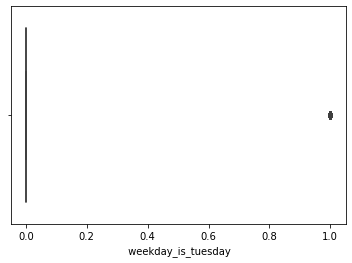

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


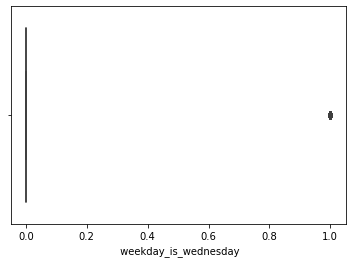

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


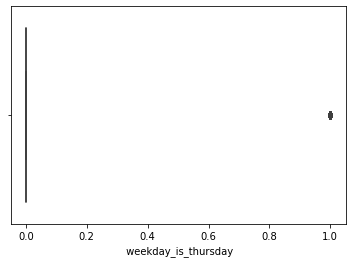

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


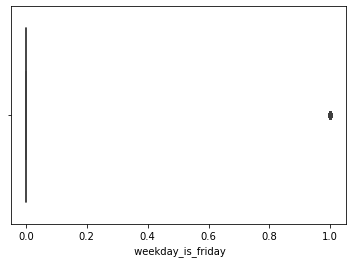

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


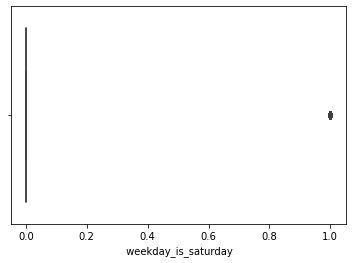

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


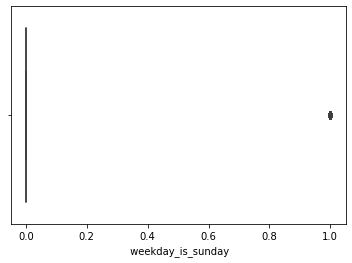

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


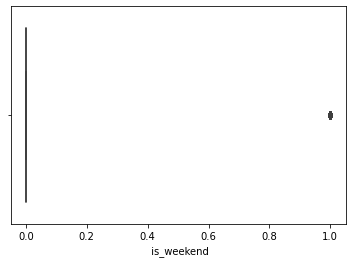

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


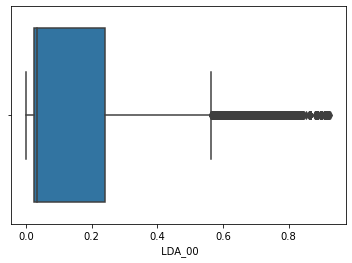

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


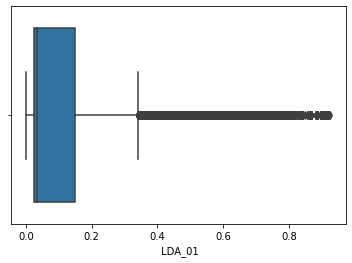

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


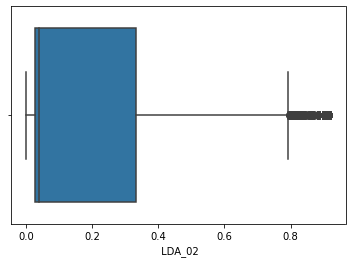

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


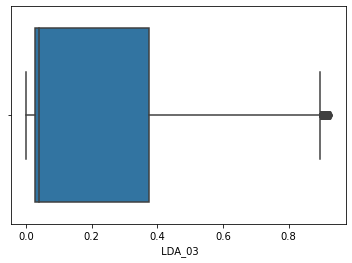

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


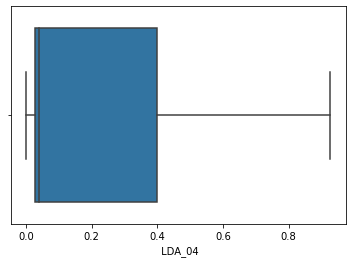

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


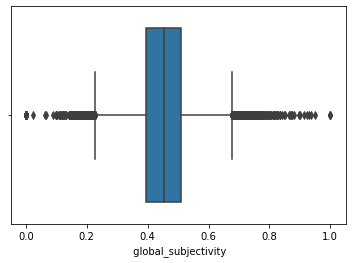

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


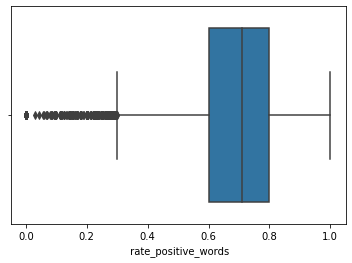

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


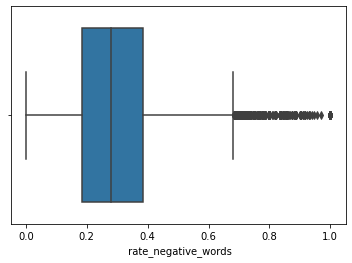

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


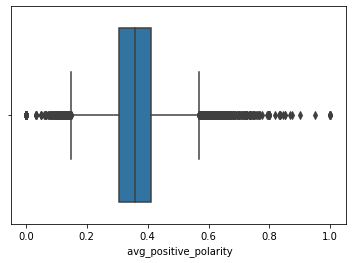

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


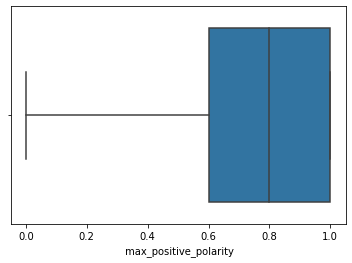

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


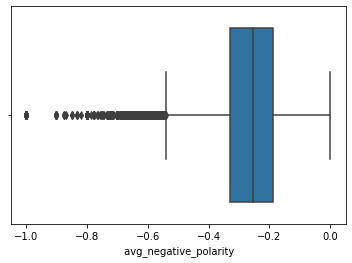

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


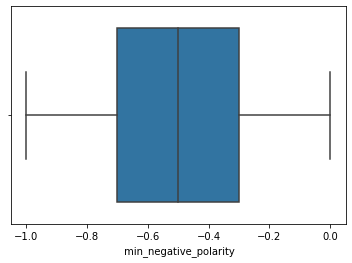

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


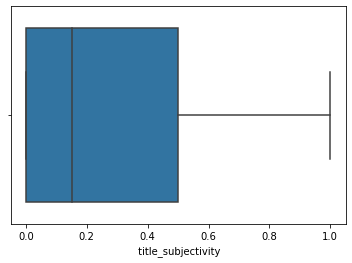

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


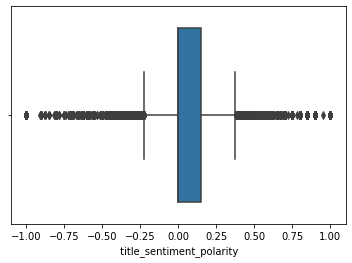

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


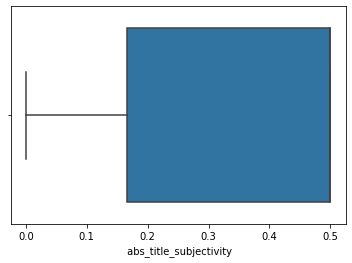

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


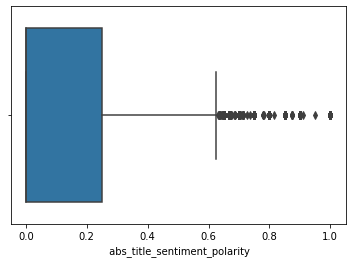

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


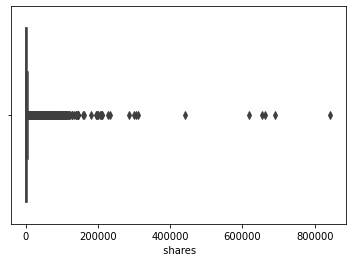

In [414]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [415]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity', ' rate_positive_words',
       ' rate_neg

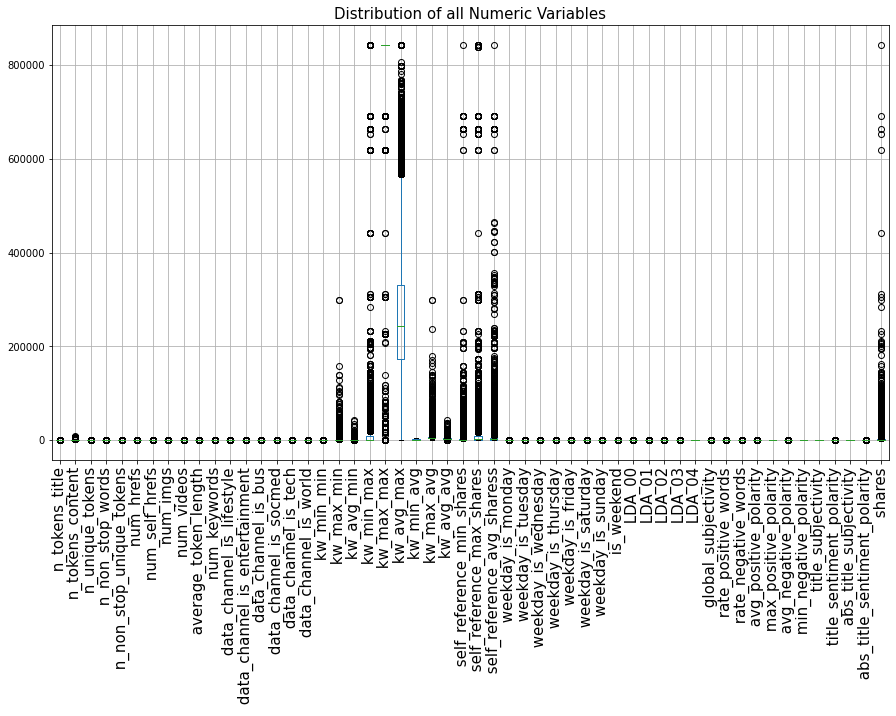

In [416]:
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

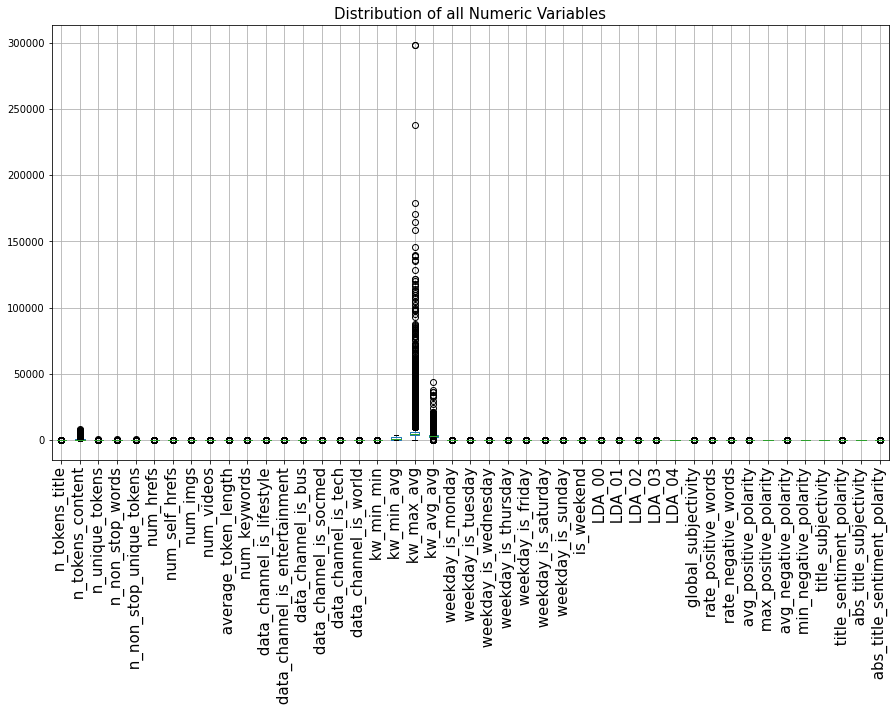

In [417]:
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', 
         ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg',
        
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

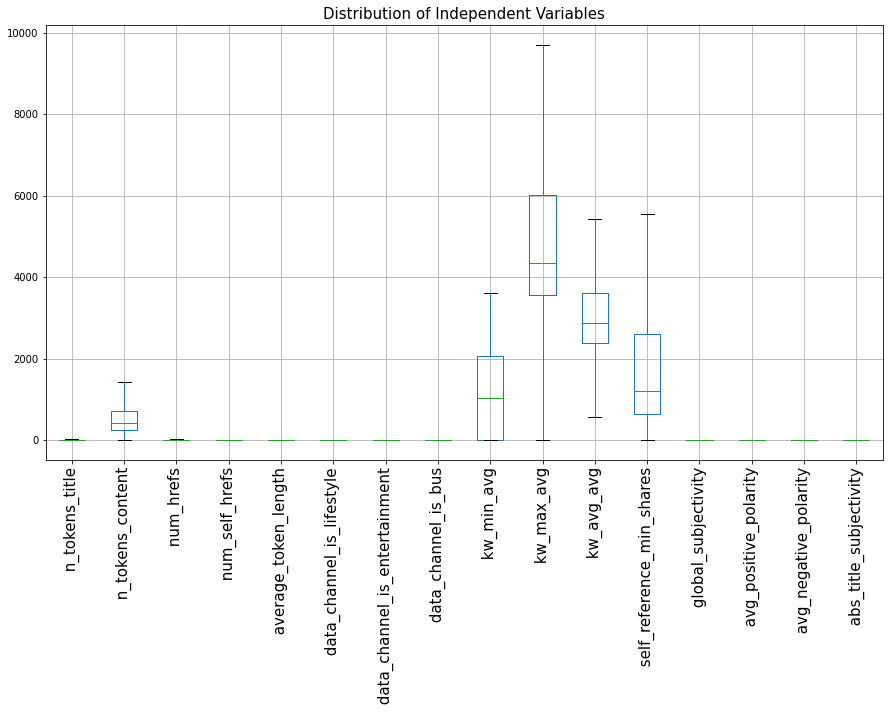

In [394]:
plt.figure(figsize = (15,8))

# plot boxplots of all the numeric variables except the variables 'Income', 'Total_Income' and 'Total_Reimbursement' 
# use 'loc[]' to select the variables
df.loc[:,[' n_tokens_title',
 ' n_tokens_content',
 ' num_hrefs',
 ' num_self_hrefs',
 ' average_token_length',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' global_subjectivity',
 ' avg_positive_polarity',
 ' avg_negative_polarity',
 ' abs_title_subjectivity']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [418]:
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.reset_index(drop = True)
# check the shape of the data
df.shape

(39644, 54)

In [422]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(df)
df_X=pd.DataFrame(X, columns = df.columns)
df_X



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,rate_negative_words,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,...,-0.366077,0.237337,-0.228941,-0.708369,-0.268895,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,...,-0.136192,-0.640040,-0.228941,1.102174,1.367424,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,...,-0.929060,1.358401,0.981798,-1.621797,-0.957871,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,...,0.290738,0.307442,0.174639,-0.862584,-0.268895,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,...,-0.948734,0.548135,0.981798,0.307944,0.075594,0.531059,0.244637,-1.569949,-0.087056,-0.248596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,...,-0.065037,-0.191635,-0.027151,-0.003726,0.075594,-0.562396,-0.269076,0.308055,-0.689658,-0.137216
39640,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,11.380809,-0.169058,...,-0.643170,0.200881,-0.228941,0.379044,0.420082,0.054425,3.498156,-0.751332,3.729424,-0.128615
39641,-0.188622,-0.221852,-0.009050,0.000675,-0.013798,1.157470,-0.594963,0.897288,-0.060829,0.626110,...,0.865450,-0.445302,-1.036100,-0.758786,-0.957871,0.531059,0.244637,-1.569949,-0.087056,-0.128615
39642,-2.080761,0.287592,-0.002477,0.000675,0.001068,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,...,1.571525,-1.118934,-1.036100,0.424968,0.075594,-0.870807,-0.269076,0.837749,-0.689658,-0.197421


In [425]:
X=df_X.drop(' shares',axis=1)
y=df_X[' shares']
X=sm.add_constant(X)

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train.shape)
print('y_train_slr', y_train.shape)

# print dimension of test set
print('X_test_slr', X_test.shape)
print('y_test_slr', y_test.shape)

X_train_slr (27750, 54)
y_train_slr (27750,)
X_test_slr (11894, 54)
y_test_slr (11894,)


In [427]:
SLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     13.76
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.52e-113
Time:                        21:35:35   Log-Likelihood:                -38994.
No. Observations:               27750   AIC:                         7.809e+04
Df Residuals:                   27698   BIC:                         7.852e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [444]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]

# create a column of variable names
vif["Features"] = df_X.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif=vif.sort_values('VIF_Factor', ascending = True).reset_index(drop = True)


vif


,VIF_Factor,Features
0,1.023439,shares
1,1.098410,n_tokens_title
2,1.228354,num_videos
3,1.303637,title_sentiment_polarity
4,1.387897,kw_min_max
5,1.392870,abs_title_subjectivity
6,1.413244,num_self_hrefs
7,1.505089,num_keywords
8,1.648751,num_imgs
9,1.695425,num_hrefs


In [446]:
df_X=df_X.drop([' weekday_is_monday',' weekday_is_tuesday'],axis=1)

In [447]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]

# create a column of variable names
vif["Features"] = df_X.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif=vif.sort_values('VIF_Factor', ascending = True).reset_index(drop = True)


vif

c:\users\puneeth\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,Features
0,1.023240,shares
1,1.098342,n_tokens_title
2,1.207859,weekday_is_friday
3,1.228351,num_videos
4,1.241294,weekday_is_thursday
5,1.244370,weekday_is_wednesday
6,1.303581,title_sentiment_polarity
7,1.387784,kw_min_max
8,1.392592,abs_title_subjectivity
9,1.413073,num_self_hrefs


In [451]:
df_X=df_X.drop([' weekday_is_saturday',' is_weekend',' weekday_is_sunday'],axis=1)

In [452]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]

# create a column of variable names
vif["Features"] = df_X.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif=vif.sort_values('VIF_Factor', ascending = True).reset_index(drop = True)


vif

,VIF_Factor,Features
0,1.023173,shares
1,1.098122,n_tokens_title
2,1.113898,weekday_is_friday
3,1.128766,weekday_is_thursday
4,1.131278,weekday_is_wednesday
5,1.227263,num_videos
6,1.303300,title_sentiment_polarity
7,1.387150,kw_min_max
8,1.391675,abs_title_subjectivity
9,1.412717,num_self_hrefs


In [453]:
SLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     13.76
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.52e-113
Time:                        23:40:49   Log-Likelihood:                -38994.
No. Observations:               27750   AIC:                         7.809e+04
Df Residuals:                   27698   BIC:                         7.852e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [454]:
df_X=df_X.drop([' LDA_03',' LDA_02',' LDA_01',' LDA_04',' LDA_00'],axis=1)

In [455]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]

# create a column of variable names
vif["Features"] = df_X.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif=vif.sort_values('VIF_Factor', ascending = True).reset_index(drop = True)


vif

,VIF_Factor,Features
0,1.022965,shares
1,1.096797,n_tokens_title
2,1.113644,weekday_is_friday
3,1.128622,weekday_is_thursday
4,1.131037,weekday_is_wednesday
5,1.196860,num_videos
6,1.302826,title_sentiment_polarity
7,1.383311,kw_min_max
8,1.387283,abs_title_subjectivity
9,1.408235,num_self_hrefs


In [457]:
df_X.shape

(39644, 44)

In [459]:
X=df_X.drop(' shares',axis=1)
y=df_X[' shares']
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, test_size = 0.3)


In [460]:
SLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     15.76
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.81e-113
Time:                        23:46:16   Log-Likelihood:                -39006.
No. Observations:               27750   AIC:                         7.810e+04
Df Residuals:                   27706   BIC:                         7.846e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [461]:
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)

0.02387495255272698

In [462]:
train_pred = MLR_model.predict(X_train)

# predict the output of the target variable from the test data
test_pred = MLR_model.predict(X_test)

In [464]:
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.9868
Root Mean Squared Error (RMSE) on test set:  0.9947
